In [2]:
%matplotlib inline

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
from scipy.ndimage import convolve
from collections import Counter
import re
from nltk.corpus import stopwords
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/yd/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

==========================
Working with Images and Text
==========================

In [4]:
tiger_image = imread('data/ds_l4/tiger.jpg')
tiger_image.shape


(600, 580, 3)

In [5]:
tiger_image.dtype

dtype('uint8')

In [6]:
r, g, b = tiger_image[:, :, 0], tiger_image[:, :, 1], tiger_image[:, :, 2]


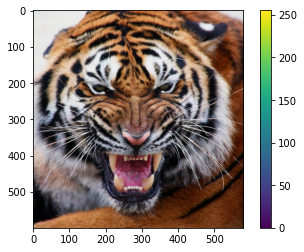

In [7]:
plt.imshow(tiger_image)
plt.colorbar()
plt.show()

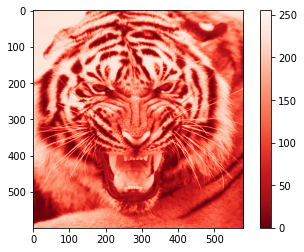

In [8]:
plt.imshow(r, cmap='Reds_r')
plt.colorbar()

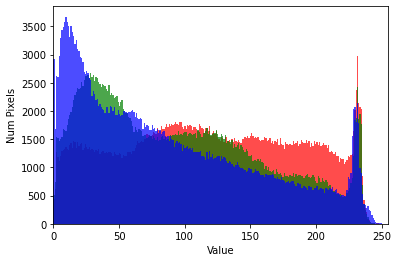

In [9]:
plt.hist(r.ravel(), bins=256, color='r', alpha=0.7)
plt.hist(g.ravel(), bins=256, color='g', alpha=0.7)
plt.hist(b.ravel(), bins=256, color='b', alpha=0.7)

plt.xlim(0, 255)

plt.xlabel('Value')
plt.ylabel('Num Pixels')
plt.show()

In [10]:
# r[r == 20] = 50
# plt.hist(r.ravel(), bins=256, color = 'r', alpha = 0.7)
# plt.hist(g.ravel(), bins=256, color = 'g', alpha = 0.7)
# plt.hist(b.ravel(), bins=256, color = 'b', alpha = 0.7)
# 
# plt.xlim(0,255)
# 
# plt.xlabel('Value')
# plt.ylabel('Num Pixels')
# plt.show()

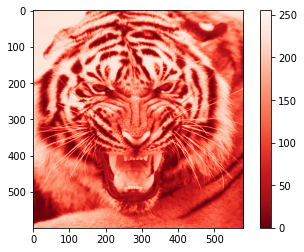

In [11]:
plt.imshow(r, cmap='Reds_r')
plt.colorbar()

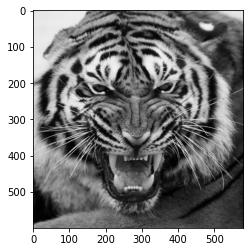

In [12]:
tiger_grayscale = 0.299 * r + 0.587 * g + 0.144 * b
# tiger_grayscale = r + g + b
plt.imshow(tiger_grayscale, cmap='gray')
# plt.imshow(tiger_grayscale)
plt.show()

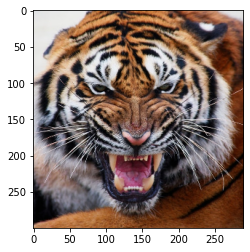

In [13]:
plt.imshow(tiger_image[::2, ::2, :],
           cmap='gray')  # Now we took 4 times less pixels to work with. This is down sampling.

In [14]:
np.product(tiger_image.shape)

1044000

In [15]:
np.product(tiger_image[::2, ::2, :].shape)

261000

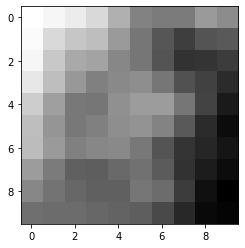

In [16]:
tiger_sample = tiger_grayscale[100:110, 100:110].astype(int)
tiger_sample
plt.imshow(tiger_sample, cmap='gray')  #

In [17]:
conv_filter = np.array([
    [0, 1, 0],
    [0, -1, 0],
    [0, 1, 0]
])

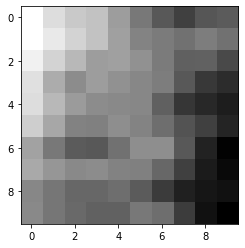

In [18]:
res = convolve(tiger_sample, conv_filter)
plt.imshow(res, cmap='gray')  #

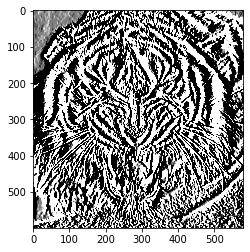

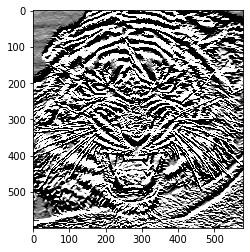

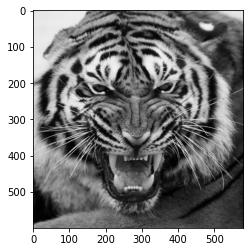

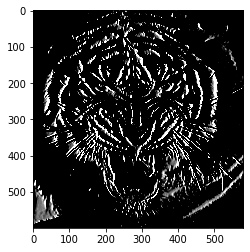

In [49]:
# conv_filt = np.ones([16, 16]) / 256   # filter radius
conv_filt = np.array([  #soberl filter
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1],
])
res = convolve(tiger_grayscale, conv_filt)
res_one = convolve(tiger_grayscale, conv_filt.T)
plt.imshow(res, cmap='gray', vmin=-5, vmax=5)  # increase contrast
plt.show()
plt.imshow(res_one, cmap='gray', vmin=-10, vmax=10)  # increase contrast
plt.show()  #
plt.imshow(tiger_grayscale, cmap='gray')  #
plt.show()  #
plt.imshow((res - tiger_grayscale), cmap='gray', vmin=-20, vmax=20)
plt.show()

In [42]:
# img[img < 40] = 0
# img[img > 215] = 255
# y = 43/35x - 48 #math function of a line with y1=0, y2=255  and x1=40, x2 = 215
thresholded = tiger_grayscale.copy()
thresholded[thresholded < 100] = 0
thresholded[thresholded >= 100] = 255

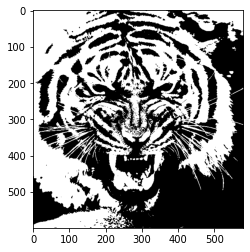

In [44]:
plt.imshow(thresholded, cmap='gray')
plt.show()

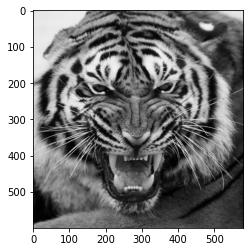

In [50]:
plt.imshow(tiger_grayscale / tiger_grayscale.mean(), cmap='gray')
plt.show()

Standartisation:

In [52]:
tiger_standartized = (tiger_grayscale - tiger_grayscale.mean()) / tiger_grayscale.std(ddof=1)
tiger_standartized.mean(), tiger_standartized.std(ddof=1)

(-1.1858713245099603e-16, 1.0)

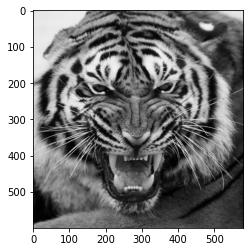

In [53]:
plt.imshow(tiger_standartized, cmap='gray')

In [61]:
new = resize(tiger_grayscale, (200, 200))
plt.imshow(new, cmap='Blues')

In [62]:
with open('data/ds_l4/alice.txt') as f:
    text = f.read()

In [70]:
char_counter = Counter(text)

In [76]:
characters = char_counter.most_common(20)

In [82]:
plt.bar([k for k, v in characters], [v for k, v in characters])
plt.xlabel('Letter')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

In [114]:
words = re.split('\W+', text)
words = [w.lower() for w in words]
# words_ = re.findall(r'\b[A-Za-z]+\b', text)
word_counter = Counter(words)
# word__counter = Counter(words_)
word_counter.most_common(20)

[('the', 1825),
 ('and', 944),
 ('to', 809),
 ('a', 695),
 ('of', 632),
 ('it', 610),
 ('she', 553),
 ('i', 546),
 ('you', 481),
 ('said', 462),
 ('in', 432),
 ('alice', 404),
 ('was', 358),
 ('that', 330),
 ('as', 274),
 ('her', 248),
 ('with', 228),
 ('at', 227),
 ('s', 222),
 ('t', 218)]

Stop words are a set of commonly used words in a language. Examples of stop words in English are “a,” “the,” “is,” “are,” etc. Stop words are commonly used in Text Mining and Natural Language Processing (NLP) to eliminate words that are so widely used that they carry very little useful information.

In [141]:
stop = set(stopwords.words('english'))
words = [w for w in words if not w in stop]
word_counter = Counter(words)
word_counter.most_common(20)

[('said', 462),
 ('alice', 404),
 ('little', 129),
 ('one', 106),
 ('gutenberg', 93),
 ('know', 88),
 ('project', 87),
 ('like', 85),
 ('would', 83),
 ('went', 83),
 ('could', 78),
 ('queen', 76),
 ('thought', 74),
 ('time', 71),
 ('see', 70),
 ('well', 63),
 ('king', 63),
 ('turtle', 60),
 ('way', 58),
 ('began', 58)]

STEMing - process giving root of the word

In [142]:
stemmer = PorterStemmer()
words_for_stemming = words
words_less = [stemmer.stem(w) for w in words_for_stemming]
word_counter_stemmed = Counter(words_less)
word_counter_stemmed.most_common(20)

[('said', 462),
 ('alic', 404),
 ('littl', 129),
 ('one', 107),
 ('look', 106),
 ('like', 97),
 ('gutenberg', 93),
 ('know', 92),
 ('project', 87),
 ('work', 86),
 ('would', 83),
 ('went', 83),
 ('thing', 82),
 ('thought', 80),
 ('could', 78),
 ('queen', 77),
 ('time', 77),
 ('go', 77),
 ('see', 71),
 ('say', 70)]

20 Newsgroups

In [147]:
corpus = fetch_20newsgroups()['data']

In [148]:
count_vectorizer = CountVectorizer()

In [149]:
count_vectorizer.fit(corpus)

CountVectorizer()

In [153]:
count_vectorizer.transform(corpus)

<11314x130107 sparse matrix of type '<class 'numpy.int64'>'
	with 1787565 stored elements in Compressed Sparse Row format>

In [156]:
tfid = TfidfVectorizer()

In [159]:
tfid_matrix = tfid.fit_transform(corpus)

In [162]:
feature_names = tfid.get_feature_names_out()
feature_names

array(['00', '000', '0000', ..., 'íålittin', 'ñaustin', 'ýé'],
      dtype=object)

In [167]:
doc = 10  # this is the index of the document, other index means other document 
feature_index = tfid_matrix[doc, :].nonzero()[1]

In [168]:
feat_scores_in_doc = [tfid_matrix[doc, x] for x in feature_index]
tfid_scores = zip(feature_index, feat_scores_in_doc)
for w, s in [(feature_names[i], s) for (i, s) in tfid_scores]:
    print(w, s)

r75 0.11674338254039138
0826 0.11923513196208567
dod 0.05972801945212657
therefore 0.060449389231221756
honk 0.11281169365911636
tuba 0.10617636298031302
motors 0.09474754146663025
axis 0.09474754146663025
myself 0.05874534909980294
jap 0.11120197829608958
beemer 0.10845945515093075
mate 0.10976203883650884
stable 0.0833643519969237
3k 0.10516354529707186
thinking 0.06026544588285472
3495 0.13175787991026996
want 0.03923864204547491
owner 0.0726608908596038
bike 0.12863897634573307
sold 0.06944928409543381
leak 0.09837884936680232
trans 0.09898636202535395
shop 0.0798857471878911
accel 0.11463663842264868
1st 0.07379258129844335
pops 0.095210866666721
oil 0.15160271043095327
leaks 0.10172888517051276
faded 0.11674338254039138
orange 0.09386550740796275
brown 0.07248106215359033
bronze 0.10516354529707186
paint 0.08083963082347315
runs 0.06337002422669938
17k 0.13175787991026996
1978 0.09188133616989423
900gts 0.13175787991026996
13 0.04977170684405233
gts 0.11674338254039138
ducati 0.1